# **Сегментация изображения**

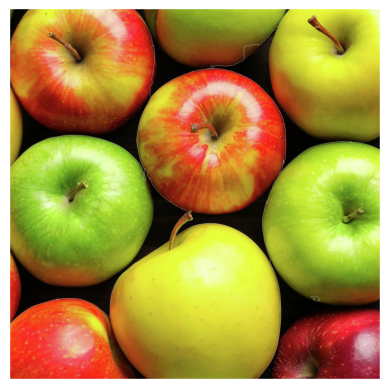

In [96]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_path = '2_segm.jpg'
image = cv2.imread(image_path)
g = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_, thres = cv2.threshold(g, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
core = np.ones((3, 3), np.uint8)
start = cv2.morphologyEx(thres, cv2.MORPH_OPEN, core, iterations=2)
surebg = cv2.dilate(start, core, iterations=3)
distrans = cv2.distanceTransform(start, cv2.DIST_L2, 5)
_, surefg = cv2.threshold(distrans, 0.7 * distrans.max(), 255, 0)
surefg = np.uint8(surefg)
idk = cv2.subtract(surebg, surefg)
_, mark = cv2.connectedComponents(surefg)
mark[idk == 255] = 0
mark = cv2.watershed(image, mark)
image[mark == -1] = [255, 255, 255]

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


# **Сшивание изображений**

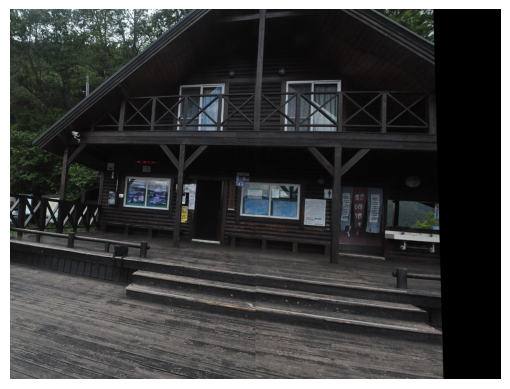

In [108]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image1 = cv2.imread('DSC_0185.jpg')
image2 = cv2.imread('DSC_0184.jpg')
g1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
g2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
orb = cv2.ORB_create()
keypoint1, desc1 = orb.detectAndCompute(g1, None)
keypoint2, desc2 = orb.detectAndCompute(g2, None)
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
match = bf.match(desc1, desc2)
match = sorted(match, key=lambda x: x.distance)
best = match[:1000]
point1 = np.float32([keypoint1[m.queryIdx].pt for m in best]).reshape(-1, 1, 2)
point2 = np.float32([keypoint2[m.trainIdx].pt for m in best]).reshape(-1, 1, 2)
H, mask = cv2.findHomography(point1, point2, cv2.RANSAC, 5.0)
height, width, _ = image2.shape
warpimage1 = cv2.warpPerspective(image1, H, (width * 2, height))
warpimage1[0:height, 0:width] = image2

plt.imshow(cv2.cvtColor(warpimage1, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()